In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras.applications import VGG16



# InceptionV3 model

In [2]:
train_data_dir = 'data/train'  
validation_data_dir = 'data/test' 

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [3]:
conv_base = InceptionV3(weights='imagenet' , include_top = False)

In [4]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalizati

 conv2d_11 (Conv2D)          (None, None, None, 32)       6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, None, None, 64)       192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, None, None, 64)       192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, None, None, 96)       288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, None, None, 96)       0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, None, None, 64)       0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, None, None, 288)      0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, None, None, 96)       55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, None, None, 96)       288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, None, None, 96)       0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, None, None, 384)      995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, None, None, 192)      147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, None, None, 192)      172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, None, None, 192)      172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, None, None, 192)      147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, None, None, 192)      576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, None, None, 768)      0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, None, None, 192)      147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, None, None, 192)      215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, None, None, 192)      215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, None, None, 160)      0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, None, None, 160)      0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, None, None, 768)      0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, None, None, 192)      576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, None, None, 192)      576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, None, None, 192)      0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, None, None, 192)      0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, None, None, 320)      552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, None, None, 192)      331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, None, None, 320)      960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, None, None, 192)      576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, None, None, 384)      0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, None, None, 384)      0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, None, None, 192)      576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, None, None, 384)      0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, None, None, 384)      0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, None, None, 384)      0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [5]:
x = conv_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [6]:
model = Model(inputs=conv_base.input, outputs=predictions)

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10


C:\Users\nauman.tasawar\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


18/18 [==============================] - 248s 13s/step - loss: 0.0000e+00 - accuracy: 0.4955 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/10
18/18 [==============================] - 228s 13s/step - loss: 0.0000e+00 - accuracy: 0.5009 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 3/10
18/18 [==============================] - 219s 12s/step - loss: 0.0000e+00 - accuracy: 0.5009 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 4/10
18/18 [==============================] - 220s 12s/step - loss: 0.0000e+00 - accuracy: 0.5009 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 5/10
18/18 [==============================] - 217s 12s/step - loss: 0.0000e+00 - accuracy: 0.5009 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 6/10
18/18 [==============================] - 223s 12s/step - loss: 0.0000e+00 - accuracy: 0.5009 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 7/10
18/18 [==============================] - 225s 12s/step - loss: 0.0000e+00 - accuracy: 0.5009 - val_l

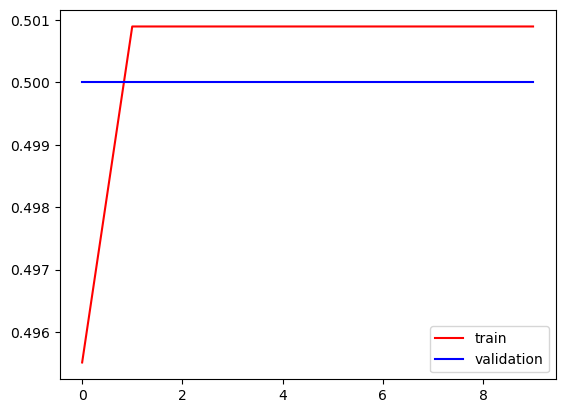

In [10]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

# VGG16 model

In [13]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 [==============================] - 35s 1us/step


In [14]:
x = conv_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)


In [15]:
model = Model(inputs=conv_base.input, outputs=predictions)
for layer in conv_base.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),  # Adjust target size for VGG16
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),  # Adjust target size for VGG16
    batch_size=32,
    class_mode='binary'
)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [17]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
18/18 [==============================] - 124s 7s/step - loss: 0.6327 - accuracy: 0.6768 - val_loss: 0.5230 - val_accuracy: 0.7571
Epoch 2/10
18/18 [==============================] - 126s 7s/step - loss: 0.4435 - accuracy: 0.8420 - val_loss: 0.5061 - val_accuracy: 0.7500
Epoch 3/10
18/18 [==============================] - 130s 7s/step - loss: 0.4399 - accuracy: 0.7935 - val_loss: 0.4148 - val_accuracy: 0.7929
Epoch 4/10
18/18 [==============================] - 128s 7s/step - loss: 0.3356 - accuracy: 0.8851 - val_loss: 0.4138 - val_accuracy: 0.8000
Epoch 5/10
18/18 [==============================] - 128s 7s/step - loss: 0.3105 - accuracy: 0.8761 - val_loss: 0.3973 - val_accuracy: 0.8214
Epoch 6/10
18/18 [==============================] - 129s 7s/step - loss: 0.2823 - accuracy: 0.8941 - val_loss: 0.3771 - val_accuracy: 0.8000
Epoch 7/10
18/18 [==============================] - 130s 7s/step - loss: 0.2683 - accuracy: 0.9084 - val_loss: 0.4031 - val_accuracy: 0.8214
Epoch 8/10
18

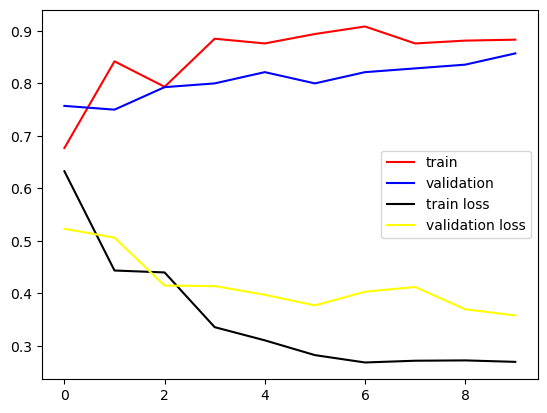

In [20]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.plot(history.history['loss'],color='black',label='train loss')
plt.plot(history.history['val_loss'],color='yellow',label='validation loss')
plt.legend()
plt.show()